In [1]:
import numpy as np;
import time;
import matplotlib.pyplot as plt;

数据初始化完成
生成聚合点
聚类完成
保存完成
保存完成


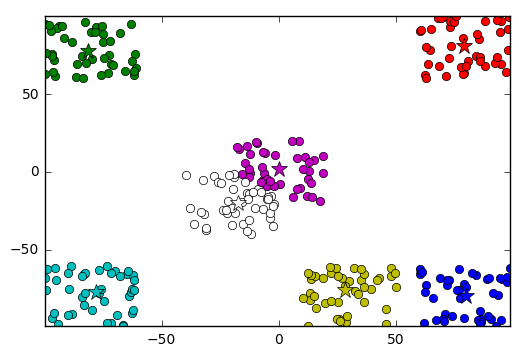

完成


In [14]:
#随机生成数据
def CreateDataset(number):
    #生成数组
    dataArry=np.zeros((number,2));
    #转为矩阵
    dataSet=np.mat(dataArry);
    #数据分类聚类
    offset=[[-80,-80],[-80,80],[-20,-20],[0,0],[80,-80],[30,-80],[80,80]];
    #生成随机数据
    for i in range(number):
        dataSet[i]=np.random.uniform(-20,20)+offset[i%7][0],np.random.uniform(-20,20)+offset[i%7][1];
    #返回数据
    return dataSet;

#矩阵求欧式距离
def Distance(vectot1,vector2):
    #求样本数据差
    sub=vector2-vectot1;
    #求矩阵平方
    pows=np.power(sub,2);
    _sum=np.sum(pows);
    #求距离
    distance=np.sqrt(_sum);
    return distance;

#求样本数据在聚集点数据中的最近点
def nearest(point,cluster_centers):
    #线初始化一个比较大的最小值
    min_dis=10000000;
    # 当前已经初始化的聚类中心的个数
    m=np.shape(cluster_centers)[0];
    #遍历聚类中心
    for i in range(m):
        #计算point与每个聚类中心的距离
        d=Distance(point,cluster_centers[i,]);
        #判断是否小是最短距离
        if min_dis>d:
            min_dis=d;
    return min_dis;
        
#生成聚类点
def clusterCenter(dataSet,k):
    #1、获取样本数据集的shape
    num,dim=dataSet.shape;
    #2、创建聚集点集
    clusterPoints=np.zeros((k,dim));
    cluster_centers=np.mat(clusterPoints);
    #3、随机在样本数据中选取一个点作为第一个聚集点
    index=np.random.randint(0,num);
    cluster_centers[0,]=dataSet[index,];
    #4、初始化一个距离序列
    disList=[0.0 for _ in range(num)];
    #5、从第二个点开始遍历聚合点（第一个点已经赋值了）
    for i in range(1,k):
        sum_all=0;
        for j in range(num):
            #6、对每一个样本点找到最近的聚类中心
            point=dataSet[j,];#获取第j个样本
            cluster_points=cluster_centers[0:i,];#获取前i个样本数据
            disList[j]=nearest(point,cluster_points);
            #7、将所有最短距离相加
            sum_all=sum_all+disList[j];
        #8、获取sum_all之间的随机值
        sum_all = np.random.uniform(0,int(sum_all));
        # 9、获得距离最远的样本点作为聚类中心点
        for j, di in enumerate(disList):
            sum_all -= di
            if sum_all > 0:
                continue
            cluster_centers[i] = dataSet[j,];
            break
    return cluster_centers;

#K-Means聚类
def kmeans(data,k,centroids):
    #获取样本维度，m表示样本个数，n表示样本维度
    m,n=np.shape(data);
    #初始化样本所属类别
    subCenter=np.mat(np.zeros((m,n)));
    #初始化判断变量
    change=True;
    #训练数据
    while change==True:
        #重置变量
        change=False;
        #遍历样本数据
        for i in range(m):
            minDis=10000000;#初始化最小数据
            minIndex=0;#初始化最小距离的
            #遍历聚集点
            for j in range(k):
                #计算两点距离
                dist=Distance(data[i,],centroids[j,]);
                #判断距离是否为最小
                if dist <minDis:
                    minDis=dist;
                    minIndex=j;
            #判断是否需要改变  subCenter[i,0]不等于minindex
            if subCenter[i,0] != minIndex:
                change=True;
                subCenter[i,]=np.mat([minIndex, minDis])
        #重新计算聚类中心
        for j in range(k):
            #创建数据维度的总和矩形
            sum_all=np.mat(np.zeros((1,n)));
            count=0;#没类的样本个数
            #循环所属类别数据
            for i in range(m):
                if subCenter[i,0]==j:
                    sum_all+=data[i,];
                    count+=1;
            #遍历数据维度
            for z in range(n):
                try:
                    centroids[j,z]=sum_all[0,z]/count;
                except:
                    print("count为零");
    return  subCenter;

#保存聚类数据   
def save_result(file_name, source):
    m, n = np.shape(source)
    f = open(file_name, "w")
    for i in range(m):
        tmp = []
        for j in range(n):
            tmp.append(str(source[i, j]))
        f.write("\t".join(tmp) + "\n")
    f.close()
    print("保存完成");
    
#主函数
if __name__=="__main__":
    dataNum=300;#样本数据集量
    k=7;#分类数
    # 1、创建数据
    dataSet=CreateDataset(dataNum);
    print("数据初始化完成");
    #生成聚合点
    cluster_centers=clusterCenter(dataSet,k);
    print("生成聚合点");
    #开始聚类
    subcenter=kmeans(dataSet,k,cluster_centers);
    print("聚类完成");
    #保存数据所属类别数据
    save_result("subcenter.txt",subcenter);
    #保存数据所属类别数据
    save_result("cluster_centers.txt",cluster_centers);
    #画图
    #plt.figure(figsize=(-100,100));
    #绘制数据
    numSamples, dim = dataSet.shape  
    mark = ['or', 'og', 'ob', 'oc', 'om', 'oy', 'ok', 'ow']  
    for i in range(numSamples):  
        markIndex = int(subcenter[i, 0]);
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex-1])
    #绘制聚合点
    mark = ['*r', '*g', '*b', '*c', '*m', '*y', '*k', '*w']  
    for i in range(k):  
        plt.plot(cluster_centers[i, 0], cluster_centers[i, 1], mark[i-1], markersize = 12) 
    plt.axis('tight')    
    plt.show()  
    print("完成");